In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

# Load the wine dataset into a DataFrame
df_wine = load_wine(as_frame=True)
df_wine = df_wine.frame
df_wine.columns = [ 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity',
                   'Hue', 'OD280/OD315 of diluted wines',
                   'Proline', 'Class label']

df_wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
X = df_wine.iloc[:, :-1].values 
y = df_wine.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state= 1) 

sc = StandardScaler() 
X_train_std = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [3]:
import numpy as np 

cov = np.cov(X_train_std.T) 
eigen_values, eigen_vectors = np.linalg.eig(cov) 

print('\nEigenvalue\n', eigen_values)
print('\nEigenvectors\n', eigen_vectors.shape)


Eigenvalue
 [4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]

Eigenvectors
 (13, 13)


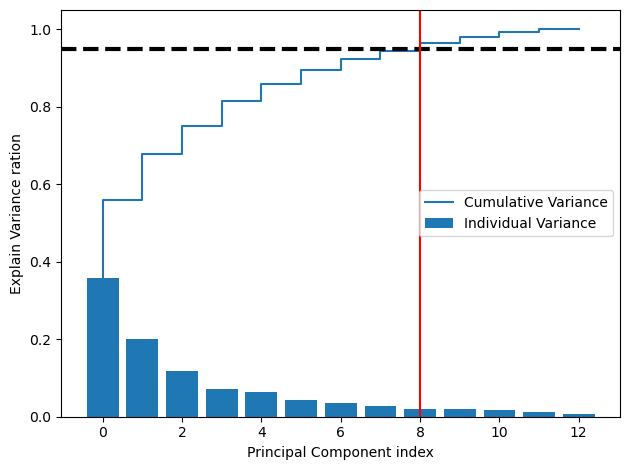

In [4]:
import matplotlib.pyplot as plt

tot = sum(eigen_values) 
var_exp = [(i / tot) for i in sorted(eigen_values, reverse=True)] 
cum = np.cumsum(var_exp) 

plt.bar(range(X_train_std.shape[1]), var_exp, label = 'Individual Variance') 
plt.step(range(X_train_std.shape[1]), cum, label = 'Cumulative Variance') 
plt.xlabel('Principal Component index') 
plt.ylabel('Explain Variance ration')
plt.legend(loc = 'center right')
plt.axhline(y=.95, linewidth = 3, linestyle = '--', color = 'black')
plt.axvline(x=8, color  = 'red')
plt.tight_layout() 
plt.show()

In [5]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i])
                for i in range(len(eigen_values))]
eigen_pairs.sort( key= lambda k:k[0], reverse =True) 
eigen_pairs

[(4.709553901660289,
  array([-0.14119433,  0.24946815, -0.05104853,  0.19890851, -0.1444494 ,
         -0.40472564, -0.42654202,  0.29573373, -0.32620144,  0.07420694,
         -0.29277478, -0.37482201, -0.2889145 ])),
 (2.6360647108023545,
  array([ 0.46732089,  0.26876924,  0.27660192, -0.01955098,  0.32120489,
          0.04839313, -0.00936768,  0.00146817,  0.04087554,  0.53982087,
         -0.27536907, -0.19149315,  0.34828709])),
 (1.5572875825492225,
  array([ 0.18497972, -0.11558438, -0.62580603, -0.63022498, -0.06808315,
         -0.14454263, -0.16109721, -0.20830498, -0.10392829,  0.07463025,
         -0.04770525, -0.16694498,  0.14905602])),
 (0.9342266236726282,
  array([-0.06135175,  0.50736306, -0.23358668,  0.06619111, -0.21808618,
          0.10100723,  0.07511595, -0.33032862,  0.45117801, -0.01323281,
         -0.46488038,  0.19553794, -0.22195876])),
 (0.8512945398770667,
  array([ 0.25730345,  0.04631822,  0.07939612, -0.14036996, -0.75131283,
          0.13576848,

In [6]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
             eigen_pairs[1][1][:, np.newaxis])) 

print('Matrix W\n', w)

Matrix W
 [[-0.14119433  0.46732089]
 [ 0.24946815  0.26876924]
 [-0.05104853  0.27660192]
 [ 0.19890851 -0.01955098]
 [-0.1444494   0.32120489]
 [-0.40472564  0.04839313]
 [-0.42654202 -0.00936768]
 [ 0.29573373  0.00146817]
 [-0.32620144  0.04087554]
 [ 0.07420694  0.53982087]
 [-0.29277478 -0.27536907]
 [-0.37482201 -0.19149315]
 [-0.2889145   0.34828709]]


In [7]:
X_train_pca2 = X_train_std.dot(w) 
X_train_pca2

array([[-3.85641154,  2.66984554],
       [ 2.52614194, -1.15316424],
       [ 3.4550073 ,  1.90429478],
       [ 1.54174592, -1.37413254],
       [-2.67172008,  0.962243  ],
       [ 1.94349087,  2.10541819],
       [-0.50905021, -0.98699848],
       [-2.60875524,  1.33475284],
       [-1.48465617,  0.60411934],
       [-2.7488583 ,  1.43440176],
       [-2.84187909,  0.28511715],
       [ 2.19160504,  0.28788805],
       [ 2.23675086,  2.40559448],
       [ 0.27870589, -2.790656  ],
       [ 2.07800678,  0.56720148],
       [-0.22728915, -2.05358997],
       [ 0.04468794, -1.85099649],
       [-2.65042194,  0.79066117],
       [ 2.11672503,  2.69999727],
       [ 2.85672098,  1.36293832],
       [ 2.124722  ,  1.2348399 ],
       [-1.72785023, -1.53761742],
       [ 2.38307168,  2.21014913],
       [ 2.94520286,  2.76927053],
       [-1.92928235, -1.08425103],
       [ 0.70920288, -2.61386231],
       [ 2.18326817,  2.70105869],
       [-0.74265223, -2.24801729],
       [-2.57051007,

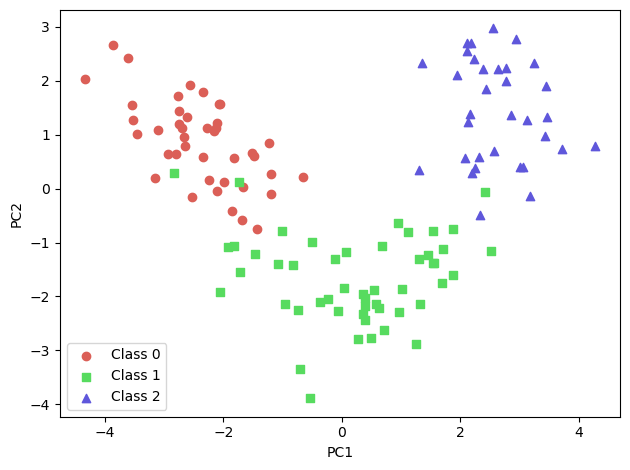

In [8]:
import seaborn as sns 

colors = sns.color_palette('hls', 3) 
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers): 
    plt.scatter(X_train_pca2[y_train == l, 0], 
               X_train_pca2[y_train == l ,1], 
               color = c, marker = m, label = f'Class {l}') 

plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.tight_layout() 
plt.legend() 
plt.show()

## PCA in Scikit-learn

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
 # setup marker generator and color map
     markers = ('o', 's', '^', 'v', '<')
     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
     cmap = ListedColormap(colors[:len(np.unique(y))])
     # plot the decision surface
     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
     np.arange(x2_min, x2_max, resolution))
     lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
     lab = lab.reshape(xx1.shape)
     plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
     plt.xlim(xx1.min(), xx1.max())
     plt.ylim(xx2.min(), xx2.max())
     # plot class examples
     for idx, cl in enumerate(np.unique(y)):
         plt.scatter(x=X[y == cl, 0],
                     y=X[y == cl, 1],
                     alpha=0.8,
                     c=colors[idx],
                    marker=markers[idx],
                     label=f'Class {cl}',
                     edgecolor='black')

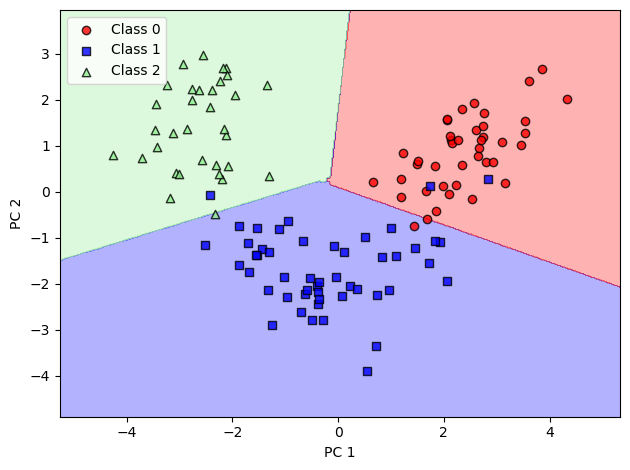

In [10]:
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsOneClassifier

pca = PCA(n_components=2) 
X_train_pca_sklearn = pca.fit_transform(X_train_std) 
X_test_pca_sklearn = pca.transform(X_test)

lr = OneVsOneClassifier(LogisticRegression(solver='liblinear', random_state= 1)) 
lr.fit(X_train_pca_sklearn, y_train)  
plot_decision_regions(X_train_pca_sklearn, y_train, classifier=lr) 
plt.xlabel('PC 1') 
plt.ylabel('PC 2') 
plt.legend() 
plt.tight_layout() 
plt.show()

In [11]:
from sklearn.metrics import accuracy_score
y_predict = lr.predict(X_test_pca_sklearn) 
print('Accuracy Score %.3f', accuracy_score(y_test, y_predict))

Accuracy Score %.3f 0.9814814814814815


In [12]:
pca = PCA(n_components=None)
X_train_pca_ration = pca.fit_transform(X_train_std) 
pca.explained_variance_ratio_

array([0.35935182, 0.20113893, 0.11882529, 0.07128404, 0.0649561 ,
       0.04356648, 0.03545179, 0.02881555, 0.02103776, 0.02007144,
       0.01614956, 0.01140877, 0.00794247])

In [13]:
## variance ratio 说明的是哪个主成分 最重要
## 接下来是介绍重要的主成分有哪些feature 组成的 

loading = eigen_vectors * np.sqrt(eigen_values) 
loading.shape

(13, 13)

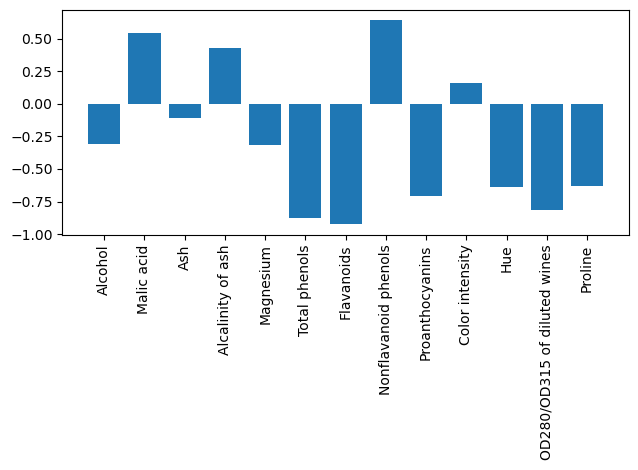

In [14]:
plt.bar(range(X_train_std.shape[1]), loading[:, 0] )
plt.xticks(range(13),labels=df_wine.columns[:-1], rotation =90) 
plt.tight_layout() 
plt.show()

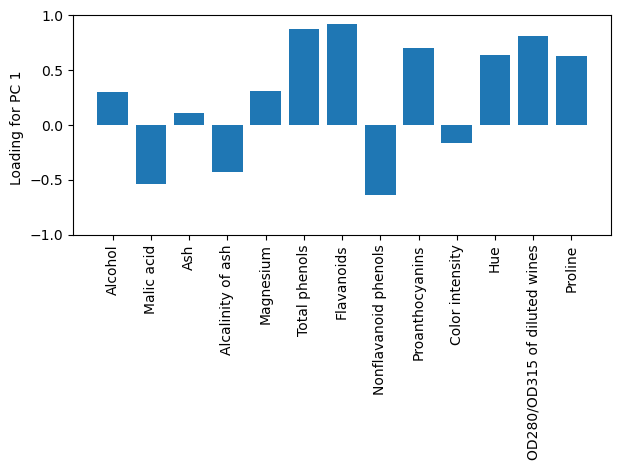

In [15]:
sklearn_loading = pca.components_.T * np.sqrt(pca.explained_variance_) 

plt.bar(range(X_train_std.shape[1]), sklearn_loading[:,    0]) 
plt.ylabel('Loading for PC 1 ') 
plt.xticks(range(X_train_std.shape[1]), rotation = 90, labels = df_wine.columns[:-1]) 
plt.ylim(-1, 1)
plt.tight_layout() 
plt.show()